In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#loading data
dataset = load_dataset('coachprerakmehta/data_jobs')
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) and pd.notna(skill_list) else skill_list)
#If it's already a list (or is NaN), leave it as-is.

In [4]:
#Only get Data Analyst jobs in United States(US)
df_DA_US = df[(df['job_title_short'] == "Data Analyst") & (df['job_country'] == 'United States')].copy()

#Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

344847     80000.0
394795     94400.0
221539    130000.0
461937     67500.0
491968    150000.0
554887     85000.0
5141       72250.0
554019     72500.0
655947    102500.0
336377    122000.0
Name: salary_year_avg, dtype: float64

<Axes: >

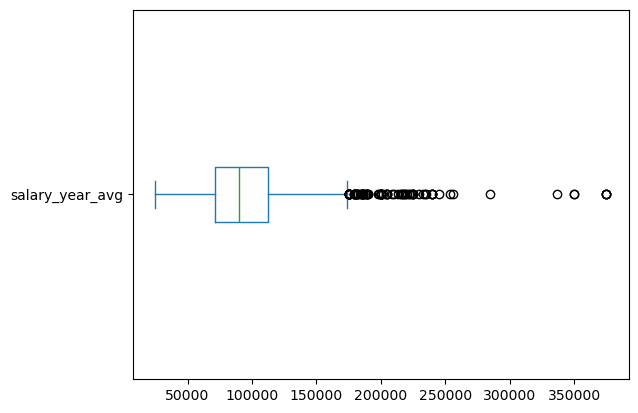

In [5]:
#using pandas
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a03ea122d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a03ea13b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a03ea116d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a03ea1d350>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a03ea1de10>],
 'means': []}

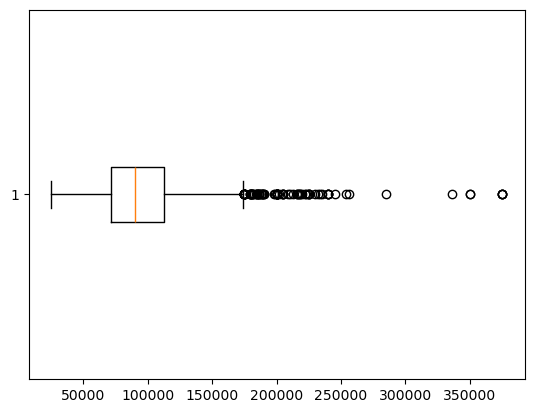

In [6]:
#using matplotlib
plt.boxplot(df_DA_US['salary_year_avg'], vert=False)

In [ ]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])     #removing NaN values from 'salary_year_avg'

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
# For each job title in job_titles:
# df_US[df_US['job_title_short'] == job_title]: Filters the DataFrame to include only rows where the job title is the current job_title in the list.
# ['salary_year_avg']: Extracts the salary data for that job title.
# The resulting job_list will be a list of Series with salaries for each job title.


C:\Users\sharb\AppData\Local\Temp\ipykernel_27520\2236521450.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


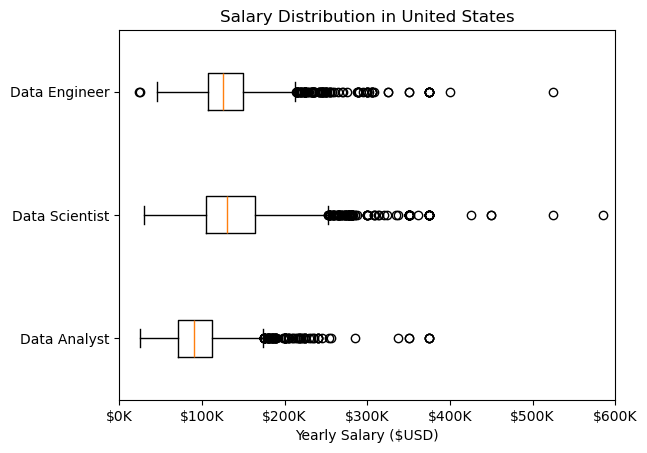

In [21]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title("Salary Distribution in United States")

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlabel("Yearly Salary ($USD)")
plt.xlim(0, 600000)
plt.show()